In [2]:
import keras_tuner
from tensorflow import keras
import visualkeras


2023-01-18 11:44:37.550279: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [56]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_val = x_test[:x_test.shape[0] // 2]
y_val = y_test[:y_test.shape[0] // 2]
x_test = x_test[x_test.shape[0] // 2:]
y_test = y_test[y_test.shape[0] // 2:]
x_test.shape, y_test.shape, x_val.shape, y_val.shape


((5000, 28, 28), (5000,), (5000, 28, 28), (5000,))

In [57]:
def build_model(hp: keras_tuner.HyperParameters) -> keras.Model:
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(28, 28, 1)))
    model.add(keras.layers.Dense(
        hp.Choice('units', [8, 16, 32]), 
        activation='relu',
    ))
    model.add(keras.layers.Dense(1, activation='relu'))
    model.compile(loss='mse')
    return model


In [58]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    overwrite=True
)

tuner.search(x_train, y_train, epochs=5, validation_data=(x_val, y_val))


Trial 3 Complete [00h 01m 39s]
val_loss: 8.359142303466797

Best val_loss So Far: 8.359142303466797
Total elapsed time: 00h 04m 24s
INFO:tensorflow:Oracle triggered exit


In [59]:
print(tuner.get_best_models())
model = tuner.get_best_models()[0]
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 28, 16)        32        
                                                                 
 dense_1 (Dense)             (None, 28, 28, 1)         17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [60]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 16
Score: 8.359142303466797
Trial summary
Hyperparameters:
units: 32
Score: 8.367648124694824
Trial summary
Hyperparameters:
units: 8
Score: 28.345399856567383


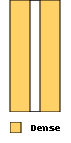

In [61]:
visualkeras.layered_view(model, draw_volume=False, legend=True)


In [55]:
x_train.shape

(60000, 28, 28)

In [62]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 17s 8ms/step - loss: 8.4363
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 8.4295
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 8.4295
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 8.4317
Epoch 5/5
1875/1875 [==============================] - 18s 9ms/step - loss: 8.4261


In [63]:
model.evaluate(x_test, y_test, verbose=2)


157/157 - 1s - loss: 8.4686 - 1s/epoch - 6ms/step


8.468640327453613

In [64]:
probability_model = keras.Sequential(
    [
        model, keras.layers.Softmax()
    ]
)
predictions = probability_model.predict(x_test)


157/157 [==============================] - 1s 4ms/step


In [68]:
from tutorials import plot_image, plot_value_array
import matplotlib.pyplot as plt
import numpy as np

# Plot the first num_rows*num_cols test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

N = num_cols * num_rows
worst_rank = np.argpartition(np.max(predictions, axis=1), N)[:N]
worst_predictions = predictions[worst_rank]
worst_x = x_test[worst_rank]
worst_y = y_test[worst_rank]

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, worst_predictions[i], worst_y[i], worst_x[i])
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, worst_predictions[i], worst_y[i])

plt.tight_layout()
plt.show()


ValueError: kth(=15) out of bounds (1)

<Figure size 1200x1000 with 0 Axes>